In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
pio.renderers.default = "vscode"

In [4]:
df = pd.read_csv(r'Mall_Customers.csv')

In [5]:
def data_overview(df):
    print("Dataset Shape:", df.shape)
    print("\nColumn Info:\n", df.dtypes)
    print("\nMissing Values:\n", df.isnull().sum())

In [6]:
data_overview(df)

Dataset Shape: (200, 5)

Column Info:
 CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'SpendingScore'}, inplace=True)

In [8]:
print(df.columns)

Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')


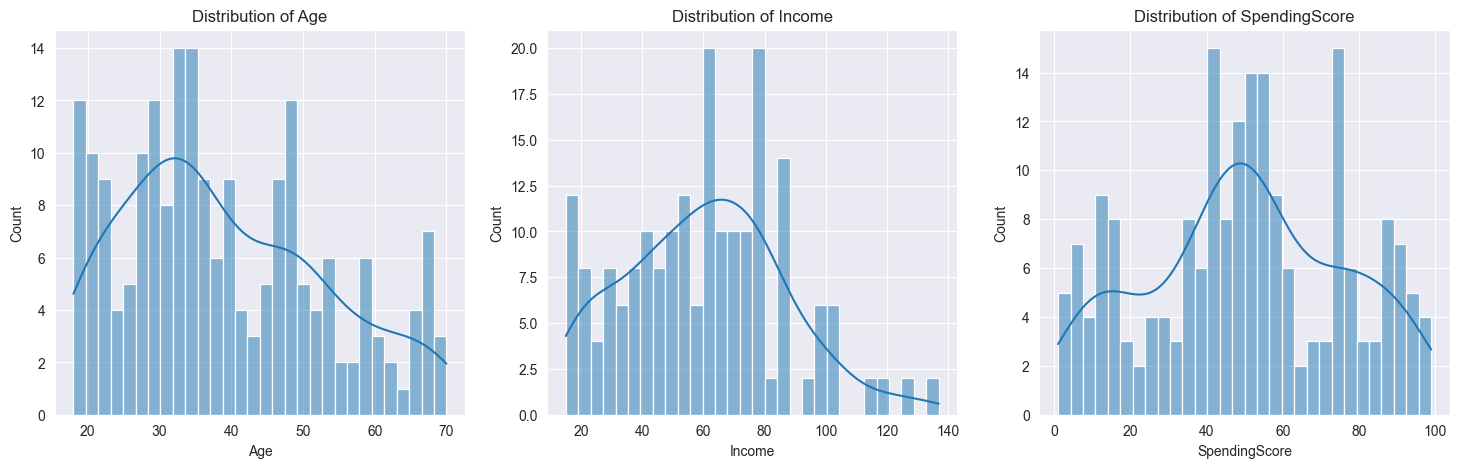

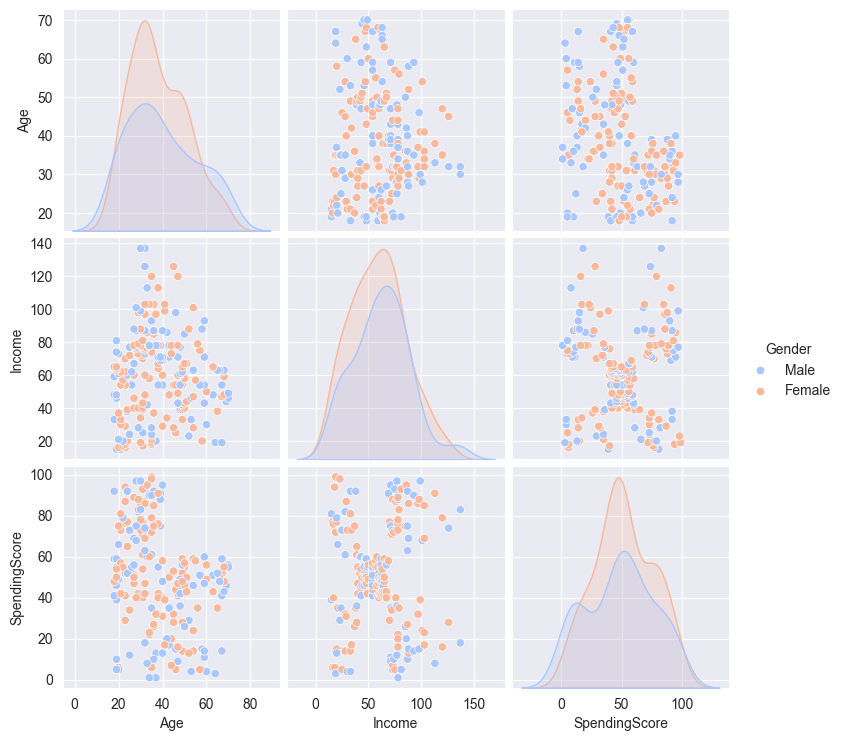

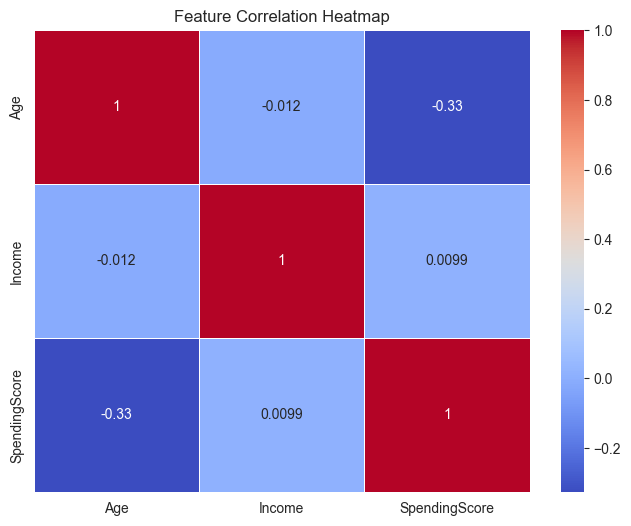

In [9]:
def visualize_data(df):
    sns.set_style("darkgrid")

    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    for i, col in enumerate(['Age', 'Income', 'SpendingScore']):
        sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
    plt.show()

    
    sns.pairplot(df[['Age', 'Income', 'SpendingScore', 'Gender']], diag_kind='kde', hue='Gender', palette="coolwarm")
    plt.show()


    
    plt.figure(figsize=(8, 6))
    sns.heatmap(df[['Age', 'Income', 'SpendingScore']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Feature Correlation Heatmap")
    plt.show()
visualize_data(df)

In [10]:
def perform_clustering(data, n_clusters):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=np.random.randint(100))
    labels = kmeans.fit_predict(data_scaled)

    silhouette = silhouette_score(data_scaled, labels)
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette:.4f}")

    return labels, kmeans.cluster_centers_

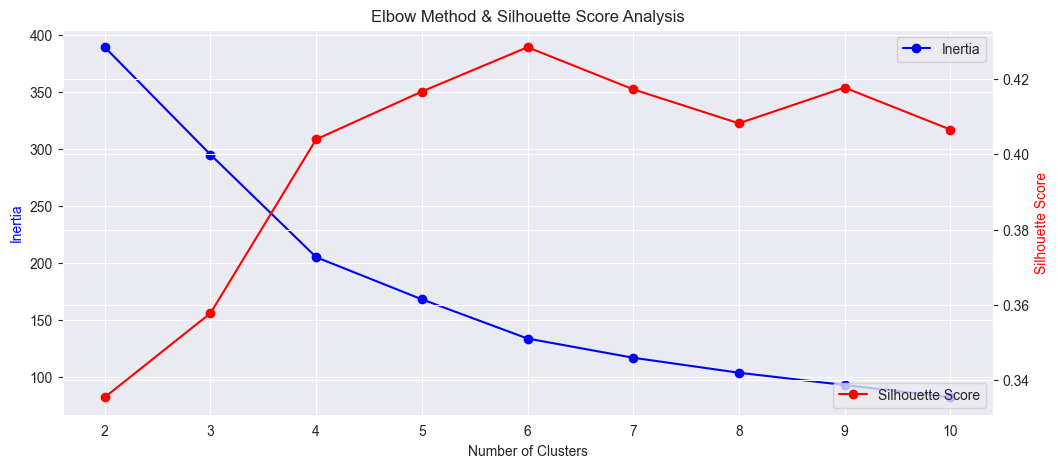

In [11]:
def find_optimal_clusters(data, max_clusters=10):
    inertia = []
    silhouette_scores = []
    data_scaled = StandardScaler().fit_transform(data)

    for n in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, random_state=42)
        labels = kmeans.fit_predict(data_scaled)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data_scaled, labels))

    fig, ax1 = plt.subplots(figsize=(12, 5))
    ax2 = ax1.twinx()
    
    ax1.plot(range(2, max_clusters+1), inertia, 'bo-', label="Inertia")
    ax2.plot(range(2, max_clusters+1), silhouette_scores, 'ro-', label="Silhouette Score")

    ax1.set_xlabel('Number of Clusters')
    ax1.set_ylabel('Inertia', color='blue')
    ax2.set_ylabel('Silhouette Score', color='red')
    ax1.legend(loc='upper right')
    ax2.legend(loc='lower right')
    
    plt.title('Elbow Method & Silhouette Score Analysis')
    plt.show()

find_optimal_clusters(df[['Age', 'Income', 'SpendingScore']])

In [12]:
df['Cluster'], centers = perform_clustering(df[['Age', 'Income', 'SpendingScore']], n_clusters=5)

Silhouette Score for 5 clusters: 0.4166


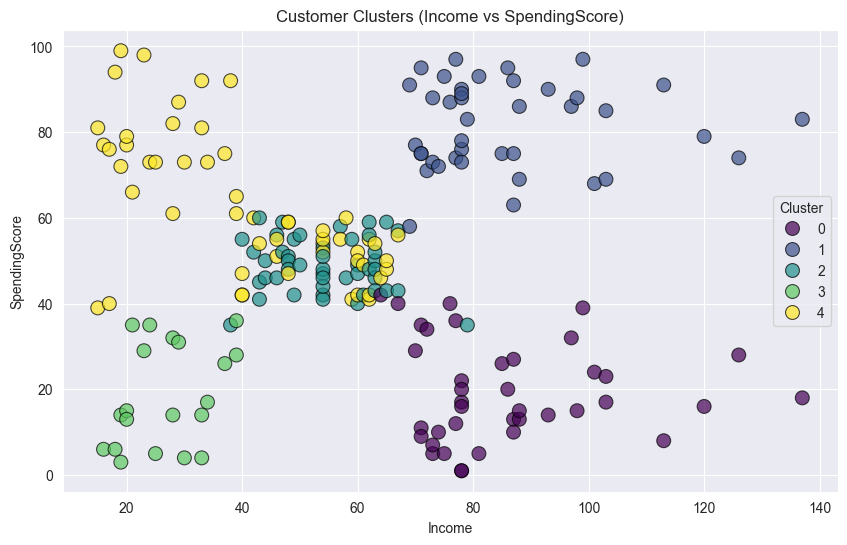

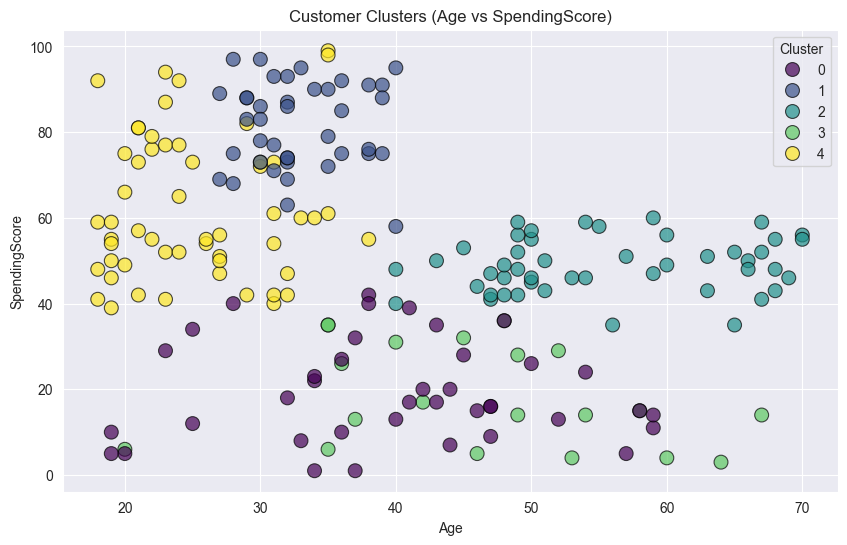

In [13]:
def plot_clusters_2d(df, x, y, cluster_col):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x, y=y, hue=cluster_col, palette="viridis", s=100, alpha=0.7, edgecolor='k')
    plt.title(f"Customer Clusters ({x} vs {y})")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title="Cluster")
    plt.show()

plot_clusters_2d(df, 'Income', 'SpendingScore', 'Cluster')
plot_clusters_2d(df, 'Age', 'SpendingScore', 'Cluster')

In [ ]:
import nbformat
print(nbformat.__version__)

5.10.4


In [18]:
def plot_clusters_3d(df):
    fig = px.scatter_3d(df, x='Age', y='Income', z='SpendingScore', color=df['Cluster'].astype(str),
                         size=np.full(df.shape[0], 8), opacity=0.7, title="3D Visualization of Customer Segments")
    fig.show()
plot_clusters_3d(df)

In [ ]:
#Alternate Renderer

def plot_clusters_3d(df):
    fig = px.scatter_3d(df, x='Age', y='Income', z='SpendingScore', color=df['Cluster'].astype(str),
                         size=np.full(df.shape[0], 8), opacity=0.7, title="3D Visualization of Customer Segments")
    fig.show(renderer="browser")
plot_clusters_3d(df)